#### 경영과 데이터베이스 기말보고서

# ROSSMANN의 1위 도약을 위한 전략적 매장 운영

#### < 목차 >

서론
1. 비즈니스 이해
2. 데이터 이해

본론

    1. 프로모션 전략
         1.1 프로모션 실시에 따른 매출 분석
         1.2 요일별 프로모션
         1.3 휴일별 프로모션 
            1.3.1 State Holiday_a 
            1.3.2 State Holiday_b
            1.3.3 State Holiday_c
         1.4 특수지점(store85)의 프로모션
            1.4.1 State Holiday_b와 c
            1.4.2 평일과의 비교
        

    2. 경쟁사 대응  
         2.1 경쟁사 거리에 따른 매출 분석
         2.2 경쟁사의 신규매장 출현에 따른 매출 분석
         2.2 경쟁사의 신규매장 거리와 Rossmann 매장 타입에 따른 매출 분석
        
 
결론

    1. 매장 운영 전략
    2. 한계점

# Ⅰ. 서론 

### 1. 비즈니스 이해
#### Background

전통적으로 화장품과 의약품의 구매 장소는 백화점이나 전문 매장 혹은 약국으로 분산되어있었다. 그러나 최근 ‘드러그 스토어’라는 종합매장이 등장하여 한 곳에서 모두 해결할 수 있게 됨에 따라 소비자가 늘었다. 브랜드들은 드러그 스토어에 입점하고, 매출 30배 상승을 이루거나 해외 시장 진출 기회를 얻으면서 스토어의 성장이 더욱 가속화되었다.  
이에 따라 드러그스토어 잠재력이 높게 평가되어 경쟁이 심화 되고 있다. 치열한 시장에서 전략 없이는 생존할 수 없게 되었다. 

<참조문헌>
- 1조대 돌파한 드럭 스토어 시장, http://www.mdtoday.co.kr/mdtoday/index.html?no=283189, 김동주, 메디컬투데이, 2017. 04. 10
- 중소제품 등용문 ‘드러그 스토어’ http://news.mk.co.kr/newsRead.php?no=811888&year=2016, 박은진, 매일경제, 2016. 11. 22
- 불붙은 드러그 스토어 경쟁, http://biz.chosun.com/site/data/html_dir/2017/06/02/2017060201258.html, 박정현, 조선 비즈니스, 2017. 06. 04

#### Business Objectives

 독일의 유명 드러그 스토어인‘Rossmann’은 업계 2위이다. 심화된 경쟁상황에서 2위에 안주한다면, 시장에서 도태될 수 밖에 없다. 그러므로 1위 도약을 목표로 장기적 생존방안을 찾는다. 그 중 하나는 프로모션이다. 프로모션은 매출성장과 고객유치에 효과적이다. 그러나 장기적으로 비용과 매출관리에 역효과를 일으킬 수 있다. 신규 경쟁사의 등장에 따라 무작정 진행하는 프로모션은 오히려 출혈을 가져온다. 이를 바탕으로 Rossmann의 효과적인 매출전략과 경쟁사 대응 전략이 무엇인지 알아본다. 
 
#### Business Success Criteria

- 고객 유치와 매출 상승에 확실한 영향을 줄 수 있는 프로모션 전략을 찾는다. 
- 기존경쟁사와 새로운 경쟁사 등장에도 효과적인 대처가 가능한 대응책을 찾는다.  
 
#### Analysis Goals

- 각 지점들의 프로모션 행사 여부에 따른 다양한 매출 영향 요인을 색출한다. 
- 경쟁사 대응책에 필요한 요인들을 색출한다.

 

## 2. 데이터의 이해
- Kaggle을 이용하여 Rossmann의 전 매장들 1115개 중 분석의 용이함을 위해 206개를 추출
- [Kaggle 데이터 활용](https://www.kaggle.com/c/rossmann-store-sales/data)
    - Store: 각 매장들의 기본 정보
    - Train: 경쟁사, 프로모션 정보
- 데이터 전처리 : 2개 entity를 결합 / 가공 / 집계

# Ⅱ. 본론

우선, 데이터 분석을 하기에 앞서 필요한 코드와 206개를 추출한 원본 파일을 실행한다.

In [39]:
import pandas as pd
import xlrd as xl
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import matplotlib.legend as legend

In [40]:
import platform

from matplotlib import font_manager, rc
plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    path = "c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system... sorry~~~~') 

In [41]:
Store206 = pd.read_excel('Store 206.xlsx')
Train206 = pd.read_excel('Train 206.xlsx')

In [42]:
#각 매장들의 기본 정보

Store206.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910,4.0,2015.0,0,NaN,NaN,NaN


In [43]:
#경쟁사, 프로모션 정보

Train206.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


[Data field 용어설명]

    -'Store' = 매장번호
    -'Sales' = 매출정보(단위:$)
    -'Assortment' = 상품구성 유형: a:기본형 c:확장형
    -'Competition Distance' = 가장 가까운 경쟁지점의 거리(단위:m) 
    -'Competition Open Since[Month/Year]' = 가장 가까운 경쟁지점이 오픈한 월과 년
    -'Promo2' = 당월 상시프로모션 0:시행안함. 1:시행함
    -'Promo2Since[Year/Week]' = Promo2를 언제부터 시작했는지 년/월
    -'Promo Interval' =  Promo2가 시행되는 월
    -'총평균 매출' = 어느 시점을 기준으로 모든 Store들의 매출을 개월 수로 나눈 평균 매출값
    -'월별평균 매출' = 각 월별로 나눈 평균 매출값

위의 데이터들은 앞으로 있을 분석과 데이터 가공의 가장 기본적인 DataSet이다.

## 1. 프로모션 전략

효과적이고 효율적인 프로모션 전략을 짜기 위해서는 우선, 어떠한 요인들이 프로모션 혹은 매출에 영향을 주는지 파악해야 한다.

### 1.1 프로모션에 따른 매출 분석

가장 기본적으로 상시 프로모션인 'Promo2'가 매출상승을 가져오는지 분석한다.
데이터 기간동안(2013.01.01~2015.07.31) 처음으로 Promo2를 실시한 매장 정보만을 추출하여 Store별로 실시 전과 후의 총 평균매출을 비교한다. 


Promo2를 실시한 해당 월만 매출이 오르고 Promo2를 하지 않은 월은 매출이 하락하여 전체적으로는 매출이 그대로 일 수 있다. 그렇기 때문에 Promo2의 상쇄효과 여부도 같이 알아보고자 한다.


[Data field 용어설명] 

    - 'Be_All_Sales' = 프로모션 전 모든 달의 총평균 매출
        예)프로모션 당기 1월 부터 실시했으면 1월 전 평균 매출
    - 'Af_All_Sales' = 프로모션 후 모든 달의 총평균 매출
    - 'Be_Prm_Sales' = 프로모션 실시한 달의 프로모션 실시전 총평균 매출    
        예)프로모션 당기 1, 2월실시했으면 전기 1, 2월의 평균 매출
    - 'Af_Prm_Sales' = 프로모션 실시한 달의 총평균 매출 
        예)프로모션 당기 1,2월 실시했으면 당기 1,2월의 평균 매출
    - 'All_상승률'= 프로모션 후 모든 달의 총평균 매출 상승률
    - 'Prm_상승률' = 프로모션 실시한 달의 총평균 매출 상승률

In [44]:
#Promo2파일은 Promotion2를 실시한 매장의 정보를 엑셀로 통해 1차 가공한 파일이다.
Promo2 = pd.read_excel('Promo2.xlsx')
Promo2.head()

,Store,Before_All_Sales,After_All_Sales,Before_Prm_Sales,After_Prm_Sales
0,20,186987.000000,205552.285714,188996.00,209543.000000
1,30,150580.076923,119805.833333,153431.50,122734.166667
2,36,217606.944444,241354.857143,232156.00,245795.666667
3,56,174202.153846,197607.388889,170553.75,201863.333333
4,77,182146.076923,199138.000000,178203.00,201702.500000


In [45]:
# 위 데이터를 토대로 평균매출 상승률을 산출한다.
Promo2['Prm_상승률']=(Promo2['After_Prm_Sales'] - Promo2['Before_Prm_Sales']) / Promo2['Before_Prm_Sales']
Promo2['All_상승률']=(Promo2['After_All_Sales'] - Promo2['Before_All_Sales']) / Promo2['Before_All_Sales']
Promo2.head()

,Store,Before_All_Sales,After_All_Sales,Before_Prm_Sales,After_Prm_Sales,Prm_상승률,All_상승률
0,20,186987.000000,205552.285714,188996.00,209543.000000,0.108717,0.099287
1,30,150580.076923,119805.833333,153431.50,122734.166667,-0.200072,-0.204371
2,36,217606.944444,241354.857143,232156.00,245795.666667,0.058752,0.109132
3,56,174202.153846,197607.388889,170553.75,201863.333333,0.183576,0.134357
4,77,182146.076923,199138.000000,178203.00,201702.500000,0.131869,0.093287


Prm_상승률이 양수로 나온다면 Promo2의 영향으로 매출이 상승하는 것이고, 음수로 나온다면 매출이 하락하고 있다는 것을 뜻한다.

All_상승률이 양수로 나온다면 Promo2의 상쇄효과가 없다는 뜻이고 음수로 나온다면 상쇄효과가 존재한다는 뜻이다. All_상승률이 양수로 나온다는 것은 Promo2가 실시한 해당 월 뿐만이 아니라 실시하지 않은 달에도 긍정적인 영향이 지속되는 것이라고 추측할 수 있기 때문이다.

이를 쉽게 육안으로 파악하기 위하여 그래프로 나타내면, 아래와 같다.

In [46]:
Promo2.set_index('Store', inplace=True)

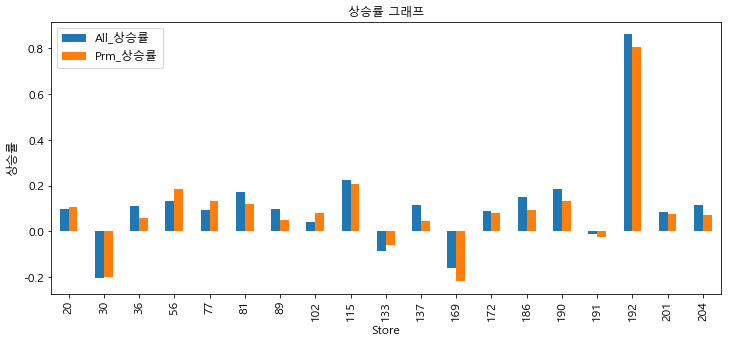

In [47]:
P2 = Promo2.loc[:,['All_상승률','Prm_상승률']].plot(kind='bar', title='상승률 그래프', figsize=(12, 5), fontsize=12)
P2.set_xlabel('Store', fontsize=12)   
P2.set_ylabel('상승률', fontsize=12)    
P2.legend(['All_상승률', 'Prm_상승률'], fontsize=12)
plt.show()

결론) 

    Prm_상승률이 양수로 나온다면 Promo2의 영향으로 매출이 상승하는 것이다. 반대로 음수로 나온다면 매출이 하락하고 있다는 것이다. 
    그러므로 All_상승률이 Prm_상승률보다 확연히 낮다면 Promo2의 역효과가 있다는 것을 뜻하는데, 위의 그래프는 All_상승률이 Prm_상승률보다 높다.
    이는 Promo2를 실시하지 않은 달에도 긍정적인 영향이 지속되는 것이라고 추측할 수 있다.

한계) 

    Promo2 실시후, 프로모션을 실시한 달만 비교한 Prm_상승률이 더 높을것으로 예상했으나  All_상승률이 더 높았다.
    또한 Promo2를 실시한 후에 오히려 매출이 하락한 매장이 소수 존재한다. 
    그러나 추가적인 정보가 부족하여 그 요인이 무엇인지 알 수가 없다 

### 1.2 요일별 프로모션 

위에서 프로모션 실시가 효과적인 것을 알았다.
그러나 더욱 효율적인 운영을 위해 프로모션을 언제 해야 효과적인지 알아보는 것이 필요하다. 

이를 위해 요일이 주는 영향을 알아보고자 한다. 

In [48]:
#Day파일은 모든 매장의 요일별 매출을 엑셀을 통해 1차 가공한 파일이다. (총 영업개월수는 31개월이다.)
day=pd.read_excel('store 요일.xlsx')

In [49]:
day

,요일,DayOfWeek,요일별 총매출,영업일수,요일별 평균매출
0,월요일,1,662780,128,5177.968750
1,화요일,2,627874,134,4685.626866
2,수요일,3,601354,132,4555.712121
3,목요일,4,552772,124,4457.838710
4,금요일,5,609716,129,4726.480620
5,토요일,6,662358,134,4942.970149


요일마다 평균 매출을 구하였다.

In [50]:
#요일별 매출 상관관계를 알아보자
np.corrcoef(day["DayOfWeek"], day["요일별 평균매출"])

array([[ 1.        , -0.23311855],
       [-0.23311855,  1.        ]])

요일과 매출은 약한 상관관계으로 보인다. 하지만 상관관계보다 다른 그래프가 더 좋은 결과를 가져올 것 같다.

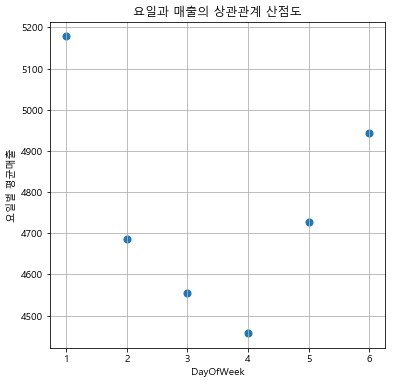

In [51]:
plt.figure(figsize=(6,6))
plt.scatter(day['DayOfWeek'], day['요일별 평균매출'], s=50)
plt.xlabel('DayOfWeek')
plt.ylabel('요일별 평균매출')
plt.title("요일과 매출의 상관관계 산점도")
plt.grid()
plt.show()

In [52]:
x= day['DayOfWeek']
y= day['요일별 평균매출']

def error(f,x,y):
    return sp.sum((f(x)-y)**2)

fp=sp.polyfit(x,y,2)
print(fp)

[  91.75685155 -675.16382234 5729.19399899]


In [53]:
# 2차항 회귀계수 생성
fp2=sp.poly1d(fp)
print(error(fp2,x,y))

14611.749444006027


2차항 모델 시각화

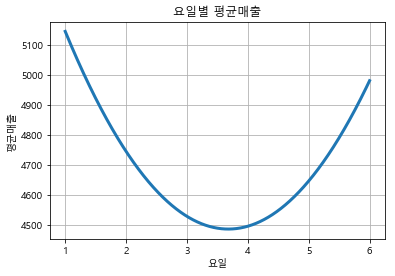

In [54]:
#1부터 6까지 차례대로 월,화,수,목,금,토요일이다.
fx=sp.linspace(1,x[5],2000)
plt.plot(fx,fp2(fx),linewidth=3)
plt.grid()
plt.xlabel('요일') 
plt.ylabel('평균매출') 
plt.title('요일별 평균매출')
plt.show()

수요일과 목요일의 매출이 급감하는 것에 비해 월요일의 매출이 가장 높다. 위의 분석결과를 토대로 프로모션이 가장 효율적인 요일을 알아볼 것이다.

월별로 진행하는 상시 프로모션인 'Promo2' 보다 당일에 진행하는 'Promo'가 분석에 더욱 적합하다고 판단하였다.
프로모션이 요일에 따라 매출에 어떠한 영향을 받는지 알아보기 위해서는 일(日)단위로 계산할 필요가 있기 때문이다.

요일별로 'Promo'의 실시 여부에 따라 평균 매출의 변화가 일정하게 나타난다면, 프로모션을 실시하기에 효율적인 요일을 찾을 수 있을 것이다.

In [55]:
#DayPrm파일은 모든 매장의 'Promo' 여부에 따른 요일별 평균을 엑셀로 1차 가공한 파일이다.
#토,일요일은 'Promo'를 진행하지 않음으로 토요일은 제외시켰다.

DayPrm=pd.read_excel('요일별 프로모션전후매출.xlsx')

In [56]:
DayPrm.head()

,요일,프로모션 전 평균매출,프로모션 후 평균매출
0,1,6007.328046,9516.705010
1,2,5512.280738,8033.304686
2,3,5450.134136,7489.190425
3,4,5530.323888,7361.941068
4,5,6121.974826,7502.862928


'Promo' 실시 전과 후 평균 매출의 간격이 클수록 'Promo'가 효과적이라는 것을 뜻한다.

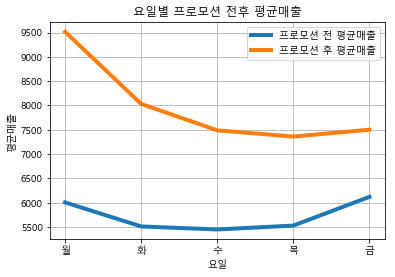

In [57]:
plt.figure()
xs = ["월", "화", "수", "목", "금"]
plt.plot(xs, [6007, 5512, 5450, 5530, 6121], lw=4, label = '프로모션 전 평균매출')
plt.plot(xs, [9516, 8033, 7489, 7361, 7502], lw=4, label = '프로모션 후 평균매출')
plt.grid()
plt.xlabel('요일') 
plt.ylabel('평균매출') 
plt.title('요일별 프로모션 전후 평균매출')
plt.legend()
plt.show()

'Promo'의 효과가 요일별로 분명하게 갈린다. 육안으로 보아도 월,화,수의 프로모션 효과가 목,금요일보다 뛰어나다는 것을 알 수 있다. 좀 더 분명한 데이터를 확보하기 위해 상승률을 비교해보자.

In [58]:
DayPrm['매출상승률']=(DayPrm['프로모션 후 평균매출'] - DayPrm['프로모션 전 평균매출']) / DayPrm['프로모션 전 평균매출']

DayPrm.head()

,요일,프로모션 전 평균매출,프로모션 후 평균매출,매출상승률
0,1,6007.328046,9516.705010,0.584183
1,2,5512.280738,8033.304686,0.457347
2,3,5450.134136,7489.190425,0.374130
3,4,5530.323888,7361.941068,0.331195
4,5,6121.974826,7502.862928,0.225563


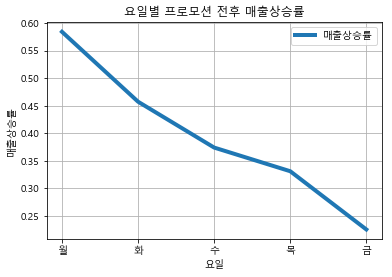

In [59]:
plt.figure()
xs = ["월", "화", "수", "목", "금"]
plt.plot(xs, [0.584183, 0.457347, 0.374130, 0.331195, 0.225563], lw=4, label = '매출상승률')
plt.grid()
plt.xlabel('요일') 
plt.ylabel('매출상승률') 
plt.title('요일별 프로모션 전후 매출상승률')
plt.legend()
plt.show()

상승률 그래프를 통해 월요일의 상승률이 가장 높고 금요일로 갈수록 상승률이 떨어지기 시작한다는 것을 더욱 명확하게 알 수 있다.

결론) 
    1. 프로모션의 효과가 가장 높은 요일은 월요일이고, 금요일이 가장낮다. 주말로 갈수록 프로모션의 효과가 적은 것으로 추측된다.
    2. 프로모션을 실시하는 가장 큰 요인은 원래 사지 않을 사람도 유인하는 것이라 할 수 있다. 그런 면에서 원래 매출이 높은 금요일은 프로모션의 효과가 적고, 토요일은
       프로모션을 진행하지 않는 것으로 추측된다.
    3. 월요일은 매출이 높음에도 불구하고 프로모션의 효과가 높다. 일요일의 고객들이 유인된 것으로 추측된다.
    4. 매출이 낮은 화요일, 수요일(혹은 목요일)과 일요일 고객도 유인할 수 있는 월요일에 프로모션을 진행하는 것이 
       가장 효율적이다. 

한계)      
   
       월요일의 매출이 높은 원인을 정확하게 찾을 수 있을 만한 추가적인 데이터가 없다. 